# **Data Diri**
*   Nama Kelompok:
  *  Nafi'ul Alam Dary Vega
  *  Hanifah Amany
  *  Alifia Bilqi
*   Kelas : TI-3E

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

dir = '/content/drive/MyDrive/Colab Notebooks/PCVK/Images/'

Mounted at /content/drive


# **Image Selfie 2**

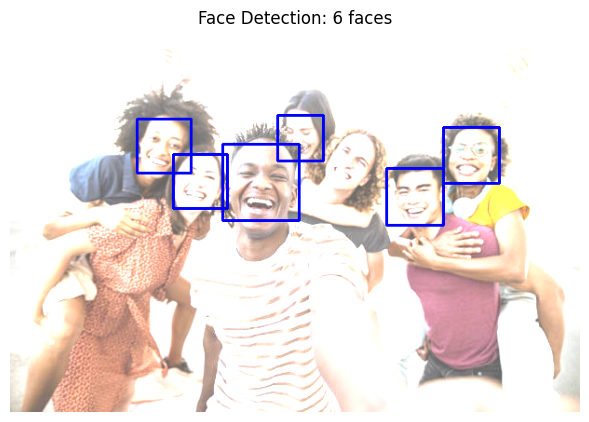

In [ ]:
# Import library
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load Haar Cascade untuk deteksi wajah
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Fungsi untuk menurunkan kontras dengan Histogram Equalization dan Gamma Correction
def process_contrast(image, gamma=2.0, use_histogram_equalization=True):
    # Konversi gambar ke grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Histogram Equalization (opsional)
    if use_histogram_equalization:
        gray = cv2.equalizeHist(gray)

    # Gamma Correction
    inv_gamma = 1.0 / gamma
    table = np.array([(i / 255.0) ** inv_gamma * 255 for i in range(256)]).astype("uint8")
    processed_image = cv2.LUT(gray, table)

    return processed_image

# Fungsi untuk deteksi wajah
def detect_faces(image, processed_image):
    # Deteksi wajah pada gambar yang telah diproses
    faces = face_cascade.detectMultiScale(
        processed_image, scaleFactor=1.1, minNeighbors=5, minSize=(10, 10)
    )

    # Gambar kotak di sekitar wajah pada gambar asli
    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)

    # Konversi gambar asli ke RGB untuk ditampilkan dengan Matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image_rgb, faces

# Path gambar input
image_path = dir + "selfie - 2.png"

# Baca gambar
original_image = cv2.imread(image_path)

# Proses gambar dengan Histogram Equalization dan Gamma Correction
processed_image = process_contrast(original_image, gamma=2.0, use_histogram_equalization=True)

# Deteksi wajah
image_with_faces, detected_faces = detect_faces(original_image.copy(), processed_image)

plt.figure(figsize=(25, 13))

# Gambar hasil deteksi wajah
plt.subplot(1, 3, 3)
plt.imshow(image_with_faces)
plt.axis('off')
plt.title(f"Face Detection: {len(detected_faces)} faces")

plt.show()


# **Image Selfie 4**

In [ ]:
from PIL import Image, ImageEnhance
import cv2
import numpy as np
import matplotlib.pyplot as plt

array([[[23, 11,  0],
        [25, 13,  0],
        [27, 15,  0],
        ...,
        [36, 32, 20],
        [35, 31, 19],
        [34, 30, 18]],

       [[25, 13,  0],
        [26, 14,  0],
        [28, 16,  0],
        ...,
        [36, 32, 20],
        [35, 31, 19],
        [34, 30, 18]],

       [[28, 16,  0],
        [29, 17,  0],
        [30, 18,  0],
        ...,
        [36, 32, 20],
        [35, 31, 19],
        [34, 30, 18]],

       ...,

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]]], dtype=uint8)
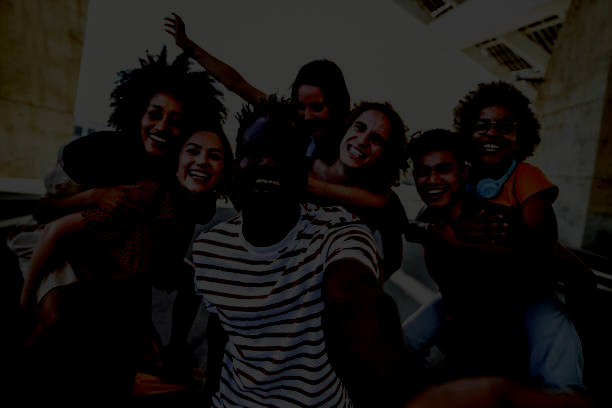

In [ ]:
# Load the uploaded image
image_path = dir + "selfie - 4.png"
original_image = cv2.imread(image_path)
original_image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)  # Convert to RGB for visualization
original_image_rgb

In [ ]:
# Function to reduce brightness
def reduce_brightness(image, factor=0.7):
    pil_image = Image.fromarray(image)
    enhancer = ImageEnhance.Brightness(pil_image)
    return np.array(enhancer.enhance(factor))

# Function to apply gamma correction
def adjust_gamma(image, gamma=0.6):
    inv_gamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** inv_gamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(image, table)

# Function to apply CLAHE for color balance
def apply_clahe(image):
    lab = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
    lab[:, :, 0] = clahe.apply(lab[:, :, 0])
    return cv2.cvtColor(lab, cv2.COLOR_LAB2RGB)

# Function to enhance sharpness
def enhance_sharpness(image, factor=1.2):
    pil_image = Image.fromarray(image)
    enhancer = ImageEnhance.Sharpness(pil_image)
    return np.array(enhancer.enhance(factor))

# Function to detect faces
def detect_faces(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
    faces = face_cascade.detectMultiScale(
        gray, scaleFactor=1.05, minNeighbors=3, minSize=(20, 20)
    )
    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)  # Draw rectangles around faces
    return image, faces

# Step-by-step processing
darkened_image = reduce_brightness(original_image_rgb, factor=0.8)  # Adjust brightness factor
gamma_corrected = adjust_gamma(darkened_image, gamma=0.7)  # Adjust gamma factor
color_balanced = apply_clahe(gamma_corrected)  # Apply CLAHE
sharpened_image = enhance_sharpness(color_balanced, factor=1.3)  # Enhance sharpness

# Detect faces
face_detected_image, faces = detect_faces(sharpened_image)

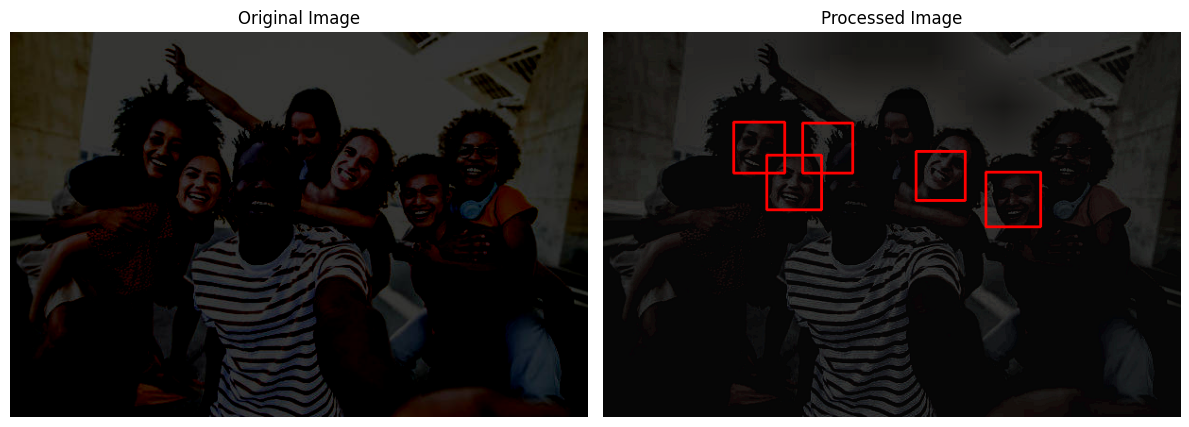

In [ ]:
# Display original and processed image side by side for comparison
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(original_image_rgb)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Processed Image")
plt.imshow(face_detected_image)
plt.axis("off")
plt.tight_layout()
plt.show()